In [1]:

def partage(P):
    p0=[]
    p1=[]
    for i in range(0,len(P)):
        if(i%2 == 0):
            p0.append(P[i])
        else:
            p1.append(P[i])
    return [p0,p1]
        
        
    

In [2]:
def FFT(P,w,n) :
    if (n ==1):
        return [P[0]]
    else:
        p0=partage(P)[0]
        p1=partage(P)[1]
        
        L0=FFT(p0,w^2,n/2)
        L1=FFT(p1,w^2,n/2)
        
        R0=[]
        R1=[]
        
        for i in range(0,(n/2)):
            R0.append(L0[i]+(w^i)*L1[i])
            R1.append(L0[i]-(w^i)*L1[i])
        return R0+R1
            


In [3]:
FFT([4,3,2,1],CC(i),4)

[10.0000000000000,
 2.00000000000000 + 2.00000000000000*I,
 2.00000000000000,
 2.00000000000000 - 2.00000000000000*I]

In [4]:
def remplizero(P,n):
    while (len(P) < n) :
        P.append(0)
    return P
    

In [5]:
def FFT_rapid(P,Q,n):
    w=exp((2*I*pi)/n)
    Q=remplizero(Q,n)
    P=remplizero(P,n)
    F0=FFT(P,w,n)
    F1=FFT(Q,w,n)
    
    F2=[]
        
    for i in range(0,n):
        F2.append(F0[i]*F1[i])
    F3=FFT(F2,w^-1,n)
    for i in range(0,n):
        F3[i]=(1/n)*F3[i]
    return F3


In [6]:
FFT_rapid([2,1],[5],4)

[10, 5, 0, 0]

In [7]:
A=[RR(1) for i in range(12)]
s=IndexedSequence(A,range(8))
t=s.fft();t
lt=t.list();lt

[8.00000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000]

In [8]:
s

Indexed sequence: [1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000]
    indexed by range(0, 8)

In [9]:
t = var('t')
f(t)=sin(18*pi*t)+3*cos(10*pi*t)

In [26]:

def calculF(f,w,N):
    F=[]
    for i in range(0,N):
        F.append(numerical_approx(f(i/N)))
    #lt=FFT(F,w,N)
    s=IndexedSequence(F,range(N))
    t=s.fft();t
    lt=t.list();lt
    
    for i in range(0,N):
        lt[i]=(1/N)*lt[i]
    return lt
    
    
        


In [27]:
lt[0]

2.16840434497101e-19

In [28]:
abs(lt[17])

abs((7.62939453125000e-6)*(sqrt(sqrt(2) + 2) + I*sqrt(-sqrt(2) + 2))^8 + 1/16384*(0.0220970869120796*(sqrt(sqrt(2) + 2) + I*sqrt(-sqrt(2) + 2))^8 - 2.82842712474619)*(sqrt(sqrt(2) + 2) + I*sqrt(-sqrt(2) + 2))^4 - 1/65536*(0.461939766255643*(sqrt(sqrt(2) + 2) + I*sqrt(-sqrt(2) + 2))^8 - (0.00597942863070453*(sqrt(sqrt(2) + 2) + I*sqrt(-sqrt(2) + 2))^8 + 3.69551813004515)*(sqrt(sqrt(2) + 2) + I*sqrt(-sqrt(2) + 2))^4 + 48.9834793427315)*(sqrt(sqrt(2) + 2) + I*sqrt(-sqrt(2) + 2))^2 + 1/131072*(1.34474957946188*(sqrt(sqrt(2) + 2) + I*sqrt(-sqrt(2) + 2))^8 - 4*(0.0164912986633371*(sqrt(sqrt(2) + 2) + I*sqrt(-sqrt(2) + 2))^8 + 2.28168239813597)*(sqrt(sqrt(2) + 2) + I*sqrt(-sqrt(2) + 2))^4 + (0.00371259162859786*(sqrt(sqrt(2) + 2) + I*sqrt(-sqrt(2) + 2))^8 - (-0.00535879233324669*(sqrt(sqrt(2) + 2) + I*sqrt(-sqrt(2) + 2))^8 + 4.59863702978301)*(sqrt(sqrt(2) + 2) + I*sqrt(-sqrt(2) + 2))^4 + 120.762414512392)*(sqrt(sqrt(2) + 2) + I*sqrt(-sqrt(2) + 2))^2 - 338.879485371141)*(sqrt(sqrt(2) + 2) + I

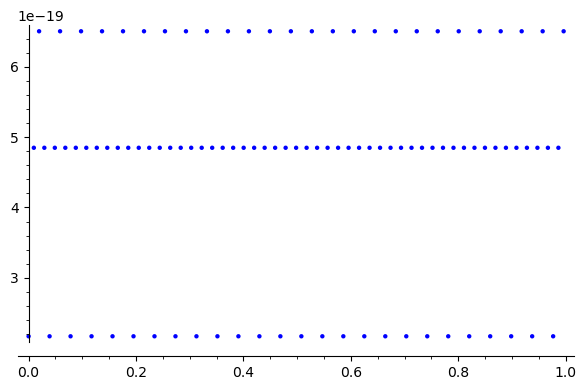

In [32]:
L=[]
lt=calculF(f,exp((2*I*pi)/512),1024)
N=1024
for i in range(0,N,10):
    L.append((i/N,abs(lt[i])))
point(L)
    
            
   
    

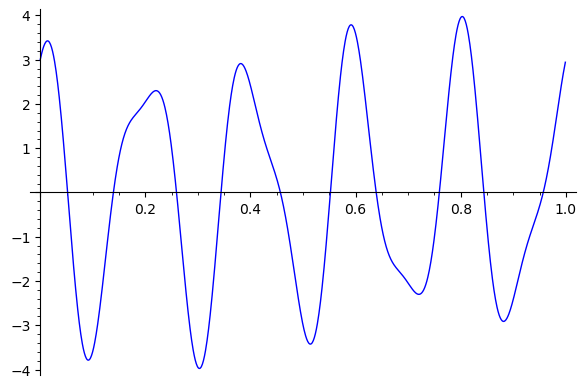

In [34]:
F=[]
L=[]
for i in range(0,N):
    F.append(numerical_approx(f(i/N)))
for i in range(0,N):
    L.append((i/N,F[i]))
line(L)
    
   
    

In [ ]:
#Ques 3 exo 4
def calculFF(lt,w,N): 
    #lt=FFT(F,w,N)
    s=IndexedSequence(lt,range(N))
    t=s.fft();t
    lt=t.list();lt
    return lt
    
    

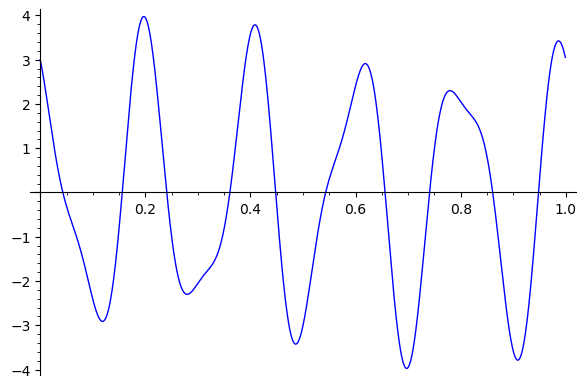

In [36]:
ltt=calculFF(lt,exp((2*I*pi)/512),1024)
L=[]
for i in range(0,N):
    L.append((i/N,real(ltt[i])))
line(L)



In [37]:
def h():
    return ZZ.random_element(-500,500)/1000

In [39]:
B=[h() for i in range(1024)]
FB=[F[i]+B[i] for i in range(1024)]

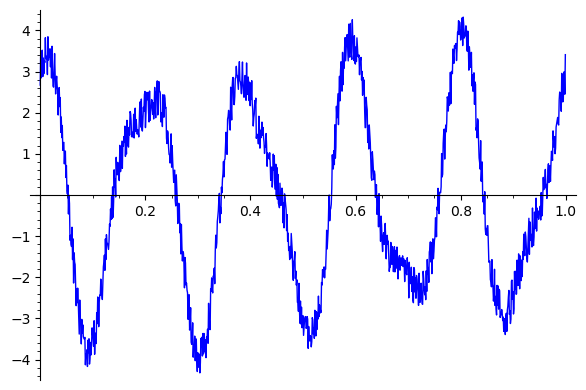

In [40]:
L=[]
for i in range(0,N):
    L.append((i/N,real(FB[i])))
line(L)